### covid-19 Vaccinations EDA

In [21]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Read the dataset and perform data cleaning

In [3]:
df = pd.read_csv('data/CovidVaccinations.csv')

In [3]:
df.head(10)

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,1/8/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,1/9/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,1/10/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,1/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,1/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [9]:
pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', None) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309799 entries, 0 to 309798
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    309799 non-null  object 
 1   continent                                   295057 non-null  object 
 2   location                                    309799 non-null  object 
 3   date                                        309799 non-null  object 
 4   total_tests                                 79387 non-null   float64
 5   new_tests                                   75403 non-null   float64
 6   total_tests_per_thousand                    79387 non-null   float64
 7   new_tests_per_thousand                      75403 non-null   float64
 8   new_tests_smoothed                          103965 non-null  float64
 9   new_tests_smoothed_per_thousand             103965 non-null  float64
 

In [11]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
  

EDA Questions:
1. Analyze changes in COVID-19 testing, vaccination, and mortality rates over different time periods.
2. Investigate COVID-19 statistics across different 'locations' and 'continents'.
3. Socioeconomic Impact: Correlate COVID-19 statistics with 'extreme_poverty', 'gdp_per_capita', and other socioeconomic indicators to study the pandemic's impact on different societies

In [14]:
# 1. Analyze total_tests over time
df['total_tests'].isnull().sum()/len(df['total_tests'])

0.743746751926249

In [15]:
df['total_tests'].describe()

count    7.938700e+04
mean     2.110457e+07
std      8.409869e+07
min      0.000000e+00
25%      3.646540e+05
50%      2.067330e+06
75%      1.024845e+07
max      9.214000e+09
Name: total_tests, dtype: float64

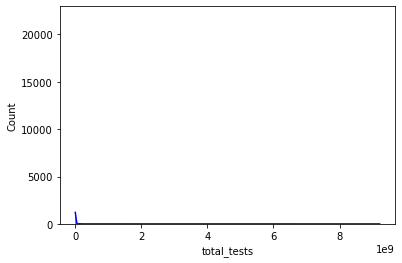

In [18]:
sns.histplot(df['total_tests'], kde = True, color = 'blue')
plt.show()

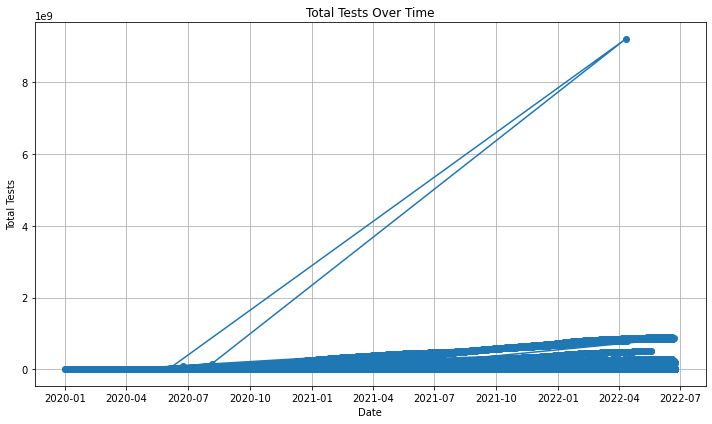

In [4]:
# Plot total tests over time!
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter out rows with missing 'total_tests' values
df_filtered = df[df['total_tests'].notnull()]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(df_filtered['date'], df_filtered['total_tests'], marker='o')

# Customize the plot
plt.title('Total Tests Over Time')
plt.xlabel('Date')
plt.ylabel('Total Tests')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

The plot shows that as the time goes by from January 2020 to July 2022, the total tests increased linearly.

Now we can look into how people fully vaccinated varied by continent and location.

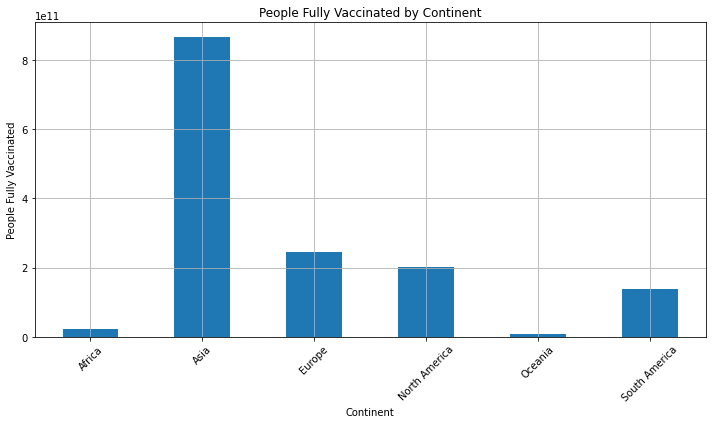

In [5]:
# By continent
vaccinated_by_continent = df.groupby('continent')['people_fully_vaccinated'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
vaccinated_by_continent.plot(kind='bar')

# Customize the plot
plt.title('People Fully Vaccinated by Continent')
plt.xlabel('Continent')
plt.ylabel('People Fully Vaccinated')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Asia has the highest number of people fully vaccinated

We can take a look at locations.

In [14]:
df['location'].value_counts().head(10)

Argentina      1231
Italy          1230
High income    1230
Germany        1230
Bangladesh     1230
World          1230
Czechia        1230
Austria        1230
Europe         1230
Lithuania      1230
Name: location, dtype: int64

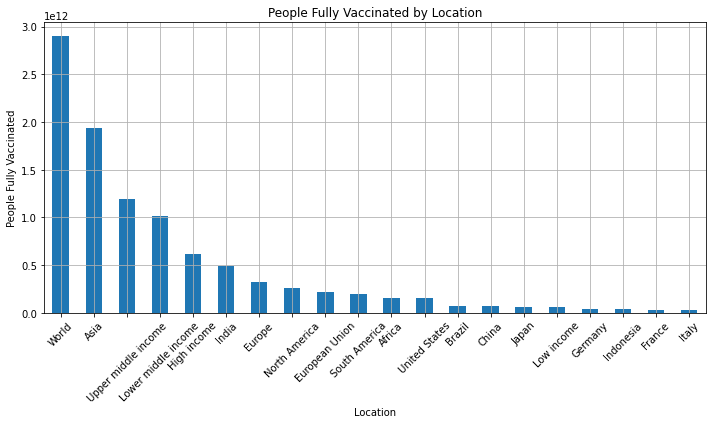

In [18]:
# By continent
vaccinated_by_location = df.groupby('location')['people_fully_vaccinated'].sum()

# Top 20 locations
top_20_locations = vaccinated_by_location.nlargest(20) # use nlargest to pull out the top 20 locations

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
top_20_locations.plot(kind='bar')

# Customize the plot
plt.title('People Fully Vaccinated by Location')
plt.xlabel('Location')
plt.ylabel('People Fully Vaccinated')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

It looks like "World", "Asia", "Upper middle income", "Lower middle income", "High income", "India", "Europe", "North America"... are the top countries with full vaccinations.
Not exactly sure what locations "World" refers to, same with the other ones.
Countries that are on top are: India, North America, South America, United States, Brazil, China, Japan.

Now we can take a look at any correlations between COVID statistics and poverty levels.
This time we can use positive rate and gdp per capital to see if there is correlation first using Pearson's correlation coefficient.

In [20]:
cleaned_df = df.dropna()

In [23]:
x = cleaned_df['positive_rate']
y = cleaned_df['gdp_per_capita']

correlation_coefficient, p_value = pearsonr(x, y)

print("Pearson's Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson's Correlation Coefficient: -0.024500916716623737
P-value: 0.8525868273239032


This result indicates that there is no relationship between covid positive rate and gdp per capital with pearson's correlation coefficient being close to 0 and p-value > 0.05 Fail to reject null hypothesis. Therefore no significant relationship between the two.